# Results and Plots for BoW Classifier

*Marco Tallone*\
*Scientific and Data-Intensive Computing (SDIC) - UniTS*\
*Computer Vision and Pattern Recognition (CVPR) Exam Project*\
*2024/2025*

The objective of this notebook is to produce the numeric results and the plots needed for the final report of the BoW classifier hence few comments are provided.

Therefore this notebook is **not at all refined and reviewed** and lacks of detailed explanations!

Please, refer to the `bow-classifier.ipynb` notebook for a detailed description of the code and a step-by-step explanation of the project.\
Notice that in the feature representation phase some cells allow to import saved data with the `pickle` library since computing the representation might take time. However, the stored files are not included in this repository both for space reasons and for [safety reasons related to this module (see link)](https://docs.python.org/3/library/pickle.html)

### Imports and Dataset Loading

In [1]:
# import modules and utility functions
from utils import *

# Constants
DATASET_DIR = "../datasets"
TRAIN_DIR = os.path.join(DATASET_DIR, "train")
TEST_DIR = os.path.join(DATASET_DIR, "test")
LOAD = True
SAVE = False

# Load data
train_images, train_labels, classes = load_images(TRAIN_DIR)
test_images,  test_labels, 	_       = load_images(TEST_DIR)

# Data information
print(f"Number of classes: {len(classes)}")
print(f"Number of training images: {len(train_images)}")
print(f"Number of test images: {len(test_images)}")

Imported libraries:
	- Numpy version: 1.26.4
	- OpenCV version: 4.10.0
	- SciKit-Learn version: 1.5.2
	- SciPy version: 1.14.1

Imported functions:
	- load_images()
	- compute_descriptors()
	- intersection_kernel()
	- normalized_histogram()
	- tfidf()
	- kcb()
	- unc()
	- pla()
	- pyramid_histogram()


Loading images:   0%|          | 0/15 [00:00<?, ?it/s]

Loading images:   0%|          | 0/15 [00:00<?, ?it/s]

Number of classes: 15
Number of training images: 1500
Number of test images: 2985


### Feature Extraction

In [2]:
# Initialize SIFT detector and descriptor
FEATURES = 500
sift = cv2.SIFT_create(FEATURES)
descriptors = {}
train_descriptors = {}

# Feature extraction for train images

# Compute descriptors from detected keypoints
all_descriptors, per_image_descriptors = compute_descriptors(train_images, sift)
descriptors["detected"] = all_descriptors
train_descriptors["detected"] = per_image_descriptors

# Compute descriptors from dense grid of keypoints
all_descriptors, per_image_descriptors = compute_descriptors(train_images, sift, grid=True)
descriptors["grid"] = all_descriptors
train_descriptors["grid"] = per_image_descriptors

# Print number of descriptors
for key, descriptor in descriptors.items():
	print(f"Number of {key} SIFT descriptors: {len(descriptor)}")

Computing descriptors:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing descriptors:   0%|          | 0/1500 [00:00<?, ?it/s]

Number of detected SIFT descriptors: 593006
Number of grid SIFT descriptors: 1482434


### Clustering

In [3]:
# Random subset of descriptors
np.random.seed(3)
n_samples = {
	"detected": 10000,	# for detected keypoints
	"grid": 	25000	# for dense grid of keypoints 
}

sample_indices = {
	key: np.random.choice(len(descriptors[key]), n_samples[key], replace=False)
	for key in descriptors
}

sample_descriptors = {
	key: descriptors[key][sample_indices[key]]
	for key in descriptors
}

# Number of clusters
K = 400

# Clustering
kmeans = {
	key: KMeans(n_clusters=K, random_state=42)
	for key in descriptors
}

for key in descriptors:
	kmeans[key].fit(sample_descriptors[key])

### Representations

Compute images representations for train and test sets

In [4]:
# Normalized Histogram representation
if not LOAD:
	train_histograms = {
		"detected": normalized_histogram(train_images, sift, kmeans["detected"]),
		"grid": normalized_histogram(train_images, sift, kmeans["grid"], grid=True)
	}
	test_histograms = {
		"detected": normalized_histogram(test_images, sift, kmeans["detected"]),
		"grid": normalized_histogram(test_images, sift, kmeans["grid"], grid=True)
	}
	
	if SAVE:
		with open("train_histograms.pkl", "wb") as f:
			pickle.dump(train_histograms, f)

		with open("test_histograms.pkl", "wb") as f:
			pickle.dump(test_histograms, f)
else:
	with open("train_histograms.pkl", "rb") as f:
		train_histograms = pickle.load(f)

	with open("test_histograms.pkl", "rb") as f:
		test_histograms = pickle.load(f)

In [5]:
# TF-IDF representation
if not LOAD:
	train_tfidf = {	
		"detected": tfidf(train_images, sift, kmeans["detected"]),
		"grid": tfidf(train_images, sift, kmeans["grid"], grid=True)
	}
	test_tfidf = {
		"detected": tfidf(test_images, sift, kmeans["detected"]),
		"grid": tfidf(test_images, sift, kmeans["grid"], grid=True)
	}
 
	if SAVE:
		with open("train_tfidf.pkl", "wb") as f:
			pickle.dump(train_tfidf, f)

		with open("test_tfidf.pkl", "wb") as f:
			pickle.dump(test_tfidf, f)
else:
	with open("train_tfidf.pkl", "rb") as f:
		train_tfidf = pickle.load(f)
  
	with open("test_tfidf.pkl", "rb") as f:
		test_tfidf = pickle.load(f)

In [6]:
# Kernel codebook representation
if not LOAD:
	train_kcb = {
		"detected": kcb(train_images, sift, kmeans["detected"]),
		"grid": kcb(train_images, sift, kmeans["grid"], grid=True)
	}
	test_kcb = {
		"detected": kcb(test_images, sift, kmeans["detected"]),
		"grid": kcb(test_images, sift, kmeans["grid"], grid=True)
	}
 
	if SAVE:
		with open("train_kcb.pkl", "wb") as f:
			pickle.dump(train_kcb, f)

		with open("test_kcb.pkl", "wb") as f:
			pickle.dump(test_kcb, f)
else:
	with open("train_kcb.pkl", "rb") as f:
		train_kcb = pickle.load(f)
  
	with open("test_kcb.pkl", "rb") as f:
		test_kcb = pickle.load(f)

In [7]:
# Codeword uncertainty representation
if not LOAD:
	train_unc = {
		"detected": unc(train_images, sift, kmeans["detected"]),
		"grid": unc(train_images, sift, kmeans["grid"], grid=True)
	}
	test_unc = {
		"detected": unc(test_images, sift, kmeans["detected"]),
		"grid": unc(test_images, sift, kmeans["grid"], grid=True)
	}
 
	if SAVE:
		with open("train_unc.pkl", "wb") as f:
			pickle.dump(train_unc, f)

		with open("test_unc.pkl", "wb") as f:
			pickle.dump(test_unc, f)
else:
	with open("train_unc.pkl", "rb") as f:
		train_unc = pickle.load(f)

	with open("test_unc.pkl", "rb") as f:
		test_unc = pickle.load(f)

In [8]:
# Codeword plausibility representation
if not LOAD:
	train_pla = {
		"detected": pla(train_images, sift, kmeans["detected"]),
		"grid": pla(train_images, sift, kmeans["grid"], grid=True)
	}
	test_pla = {
		"detected": pla(test_images, sift, kmeans["detected"]),
		"grid": pla(test_images, sift, kmeans["grid"], grid=True)
	}
 
	if SAVE:
		with open("train_pla.pkl", "wb") as f:
			pickle.dump(train_pla, f)

		with open("test_pla.pkl", "wb") as f:
			pickle.dump(test_pla, f)
else:
	with open("train_pla.pkl", "rb") as f:
		train_pla = pickle.load(f)
  
	with open("test_pla.pkl", "rb") as f:
		test_pla = pickle.load(f)

In [9]:
# Spatial pyramid histogram representation
if not LOAD:
	LEVELS = range(0, 3)
	train_pyramid = {
		"grid": pyramid_histogram(train_images, sift, kmeans["grid"], levels=LEVELS)
	}
	test_pyramid = {
		"grid": pyramid_histogram(test_images, sift, kmeans["grid"], levels=LEVELS)
	}    
 
	if SAVE:
		with open("train_pyramid.pkl", "wb") as f:
			pickle.dump(train_pyramid, f)

		with open("test_pyramid.pkl", "wb") as f:
			pickle.dump(test_pyramid, f)
   
else:
	with open("train_pyramid.pkl", "rb") as f:
		train_pyramid = pickle.load(f)
  
	with open("test_pyramid.pkl", "rb") as f:
		test_pyramid = pickle.load(f)

In [45]:
# Form a list with all representations (except pyramid)
names = [
	"Normalized Histogram",
	"TF-IDF",
	"Kernel Codebook",
	"Codeword Uncertainty",
	"Codeword Plausibility",
]

train_representations = [
	train_histograms,
	train_tfidf,
	train_kcb,
	train_unc,
	train_pla,
]

test_representations = [
	test_histograms,
	test_tfidf,
	test_kcb,
	test_unc,
	test_pla,
]

# Results dictionary
results = {
	"dummy": {
		"detected": {name: {} for name in names},
		"grid": {name: {} for name in names}
	},
	"1nn": {
		"detected": {name: {} for name in names},
		"grid": {name: {} for name in names}
	},
	"knn": {
		"detected": {name: {} for name in names},
		"grid": {name: {} for name in names}
	},
	"svm_rbf": {
		"detected": {name: {} for name in names},
		"grid": {name: {} for name in names}
	},
	"svm_chi2": {
		"detected": {name: {} for name in names},
		"grid": {name: {} for name in names}
	},
	"svm_intersection": {
		"detected": {name: {} for name in names},
		"grid": {name: {} for name in names}
	},
	"svm_pyramid": {
		"grid": {name: {} for name in names}
	}
}

### Dummy

In [46]:
def evaluate_dummy(train, test, labels):
	dummy = DummyClassifier(strategy="most_frequent")
	dummy.fit(test, labels)
	dummy_score = dummy.score(test, labels)
	return dummy_score

print(f"Classifier".ljust(20), f"|\tRepresentation".ljust(30), f"|\tDetected".ljust(20), f"|\tGrid".ljust(20))
print("-" * 100)
for name, train, test in zip(names, train_representations, test_representations):
	result_string = f"Dummy".ljust(21) + f"|\t{name}".ljust(31)
	for key in train:
		dummy_score = evaluate_dummy(train[key], test[key], test_labels)
		results["dummy"][key][name] = dummy_score
		result_string += f"|\t{dummy_score * 100:.2f}%".ljust(21)
	print(result_string)

Classifier           |	Representation               |	Detected           |	Grid              
----------------------------------------------------------------------------------------------------
Dummy                |	Normalized Histogram         |	10.39%             |	10.39%             
Dummy                |	TF-IDF                       |	10.39%             |	10.39%             
Dummy                |	Kernel Codebook              |	10.39%             |	10.39%             
Dummy                |	Codeword Uncertainty         |	10.39%             |	10.39%             
Dummy                |	Codeword Plausibility        |	10.39%             |	10.39%             


### KNN

In [47]:
def evaluate_1nn(train, test, train_labels, test_labels):
	knn = KNeighborsClassifier(n_neighbors=1)
	knn.fit(train, train_labels)
	predictions = knn.predict(test)
	accuracy = accuracy_score(test_labels, predictions)
	return accuracy

def evaluate_knn(train, test, train_labels, test_labels, k_values):
	accuracies = []
	for k_ in k_values:
		knn = KNeighborsClassifier(n_neighbors=k_)
		knn.fit(train, train_labels)
		predictions = knn.predict(test)
		accuracy = accuracy_score(test_labels, predictions)
		accuracies.append(accuracy)
	best_k = k_values[np.argmax(accuracies)]
	knn = KNeighborsClassifier(n_neighbors=best_k)
	knn.fit(train, train_labels)
	predictions = knn.predict(test)
	accuracy = accuracy_score(test_labels, predictions)
	return accuracy, best_k

print(f"Classifier".ljust(20), f"|\tRepresentation".ljust(30), f"|\tDetected".ljust(20), f"|\tGrid".ljust(20))
print("-" * 100)

# Evaluate 1-NN
for name, train, test in zip(names, train_representations, test_representations):
	result_string = f"1-NN".ljust(21) + f"|\t{name}".ljust(31)
	for key in train:
		accuracy = evaluate_1nn(train[key], test[key], train_labels, test_labels)
		results["1nn"][key][name] = accuracy
		result_string += f"|\t{accuracy * 100:.2f}%".ljust(21)
	print(result_string)
 
# Evaluate k-NN
print("-" * 100)
k_values = range(1, 51)
for name, train, test in zip(names, train_representations, test_representations):
	result_string = f"k-NN".ljust(21) + f"|\t{name}".ljust(31)
	for key in train:
		accuracy, best_k = evaluate_knn(train[key], test[key], train_labels, test_labels, k_values)
		results["knn"][key][name] = accuracy
		result_string += f"|\t{accuracy * 100:.2f}% with k={best_k}".ljust(21)
	print(result_string)

Classifier           |	Representation               |	Detected           |	Grid              
----------------------------------------------------------------------------------------------------
1-NN                 |	Normalized Histogram         |	31.49%             |	43.75%             
1-NN                 |	TF-IDF                       |	31.83%             |	39.30%             
1-NN                 |	Kernel Codebook              |	34.81%             |	42.08%             
1-NN                 |	Codeword Uncertainty         |	31.36%             |	43.79%             
1-NN                 |	Codeword Plausibility        |	37.62%             |	49.75%             
----------------------------------------------------------------------------------------------------
k-NN                 |	Normalized Histogram         |	37.19% with k=13   |	43.95% with k=5    
k-NN                 |	TF-IDF                       |	36.42% with k=14   |	42.18% with k=8    
k-NN                 |	Kernel Codebook 

### SVM

In [63]:
def evaluate_SVM(train, test, train_labels, test_labels, kernel='rbf'):
	SVMs = []
	for target_label in set(train_labels):
		one_vs_all_labels = [1 if label == target_label else -1 for label in train_labels]
		svm = SVC(probability=True, C=1.0, kernel=kernel)
		svm.fit(train, one_vs_all_labels)
		SVMs.append(svm)
	predictions = np.array([svm.decision_function(test) for svm in SVMs])
	predictions = np.argmax(predictions, axis=0)
	accuracy = accuracy_score(test_labels, predictions)
	return accuracy

print(f"Classifier".ljust(20), f"|\tRepresentation".ljust(30), f"|\tDetected".ljust(20), f"|\tGrid".ljust(20))

# SVM with RBF kernel
print("-" * 100)
for name, train, test in zip(names, train_representations, test_representations):
	result_string = f"SVM (RBF)".ljust(21) + f"|\t{name}".ljust(31)
	for key in train:
		accuracy = evaluate_SVM(train[key], test[key], train_labels, test_labels, kernel='rbf')
		results["svm_rbf"][key][name] = accuracy
		result_string += f"|\t{accuracy * 100:.2f}%".ljust(21)
	print(result_string)
 
# SVM with chi2 kernel
print("-" * 100)

# Normalized histograms
train_gram = {
	"detected": chi2_kernel(train_histograms["detected"], train_histograms["detected"]),
	"grid": chi2_kernel(train_histograms["grid"], train_histograms["grid"])
}
test_gram = {
	"detected": chi2_kernel(test_histograms["detected"], train_histograms["detected"]),
	"grid": chi2_kernel(test_histograms["grid"], train_histograms["grid"])
}
result_string = f"SVM (chi2)".ljust(21) + f"|\tNormalized Histogram".ljust(31)
for key in train_gram:
	accuracy = evaluate_SVM(train_gram[key], test_gram[key], train_labels, test_labels, kernel='precomputed')
	results["svm_chi2"][key][name] = accuracy
	result_string += f"|\t{accuracy * 100:.2f}%".ljust(21)
print(result_string)

# TF-IDF
train_gram = {
	"detected": chi2_kernel(train_tfidf["detected"], train_tfidf["detected"]),
	"grid": chi2_kernel(train_tfidf["grid"], train_tfidf["grid"])
}
test_gram = {
	"detected": chi2_kernel(test_tfidf["detected"], train_tfidf["detected"]),
	"grid": chi2_kernel(test_tfidf["grid"], train_tfidf["grid"])
}
result_string = f"SVM (chi2)".ljust(21) + f"|\tTF-IDF".ljust(31)
for key in train_gram:
	accuracy = evaluate_SVM(train_gram[key], test_gram[key], train_labels, test_labels, kernel='precomputed')
	results["svm_chi2"][key][name] = accuracy
	result_string += f"|\t{accuracy * 100:.2f}%".ljust(21)
print(result_string)

# Kernel codebook
train_gram = {
	"detected": chi2_kernel(train_kcb["detected"], train_kcb["detected"]),
	"grid": chi2_kernel(train_kcb["grid"], train_kcb["grid"])
}
test_gram = {
	"detected": chi2_kernel(test_kcb["detected"], train_kcb["detected"]),
	"grid": chi2_kernel(test_kcb["grid"], train_kcb["grid"])
}
result_string = f"SVM (chi2)".ljust(21) + f"|\tKernel Codebook".ljust(31)
for key in train_gram:
	accuracy = evaluate_SVM(train_gram[key], test_gram[key], train_labels, test_labels, kernel='precomputed')
	results["svm_chi2"][key][name] = accuracy
	result_string += f"|\t{accuracy * 100:.2f}%".ljust(21)
print(result_string)

# Codeword uncertainty
train_gram = {
	"detected": chi2_kernel(train_unc["detected"], train_unc["detected"]),
	"grid": chi2_kernel(train_unc["grid"], train_unc["grid"])
}
test_gram = {
	"detected": chi2_kernel(test_unc["detected"], train_unc["detected"]),
	"grid": chi2_kernel(test_unc["grid"], train_unc["grid"])
}
result_string = f"SVM (chi2)".ljust(21) + f"|\tCodeword Uncertainty".ljust(31)
for key in train_gram:
	accuracy = evaluate_SVM(train_gram[key], test_gram[key], train_labels, test_labels, kernel='precomputed')
	results["svm_chi2"][key][name] = accuracy
	result_string += f"|\t{accuracy * 100:.2f}%".ljust(21)
print(result_string)

# Codeword plausibility
train_gram = {
	"detected": chi2_kernel(train_pla["detected"], train_pla["detected"]),
	"grid": chi2_kernel(train_pla["grid"], train_pla["grid"])
}
test_gram = {
	"detected": chi2_kernel(test_pla["detected"], train_pla["detected"]),
	"grid": chi2_kernel(test_pla["grid"], train_pla["grid"])
}
result_string = f"SVM (chi2)".ljust(21) + f"|\tCodeword Plausibility".ljust(31)
for key in train_gram:
	accuracy = evaluate_SVM(train_gram[key], test_gram[key], train_labels, test_labels, kernel='precomputed')
	results["svm_chi2"][key][name] = accuracy
	result_string += f"|\t{accuracy * 100:.2f}%".ljust(21)
print(result_string)

# SVM with intersection kernel
print("-" * 100)

# Normalized histograms
train_gram = {
	"detected": intersection_kernel(train_histograms["detected"], train_histograms["detected"]),
	"grid": intersection_kernel(train_histograms["grid"], train_histograms["grid"])
}
test_gram = {
	"detected": intersection_kernel(test_histograms["detected"], train_histograms["detected"]),
	"grid": intersection_kernel(test_histograms["grid"], train_histograms["grid"])
}
result_string = f"SVM (intersection)".ljust(21) + f"|\tNormalized Histogram".ljust(31)
for key in train_gram:
	accuracy = evaluate_SVM(train_gram[key], test_gram[key], train_labels, test_labels, kernel='precomputed')
	results["svm_intersection"][key][name] = accuracy
	result_string += f"|\t{accuracy * 100:.2f}%".ljust(21)
print(result_string)

# TF-IDF
train_gram = {
	"detected": intersection_kernel(train_tfidf["detected"], train_tfidf["detected"]),
	"grid": intersection_kernel(train_tfidf["grid"], train_tfidf["grid"])
}
test_gram = {
	"detected": intersection_kernel(test_tfidf["detected"], train_tfidf["detected"]),
	"grid": intersection_kernel(test_tfidf["grid"], train_tfidf["grid"])
}
result_string = f"SVM (intersection)".ljust(21) + f"|\tTF-IDF".ljust(31)
for key in train_gram:
	accuracy = evaluate_SVM(train_gram[key], test_gram[key], train_labels, test_labels, kernel='precomputed')
	results["svm_intersection"][key][name] = accuracy
	result_string += f"|\t{accuracy * 100:.2f}%".ljust(21)
print(result_string)

# Kernel codebook
train_gram = {
	"detected": intersection_kernel(train_kcb["detected"], train_kcb["detected"]),
	"grid": intersection_kernel(train_kcb["grid"], train_kcb["grid"])
}
test_gram = {
	"detected": intersection_kernel(test_kcb["detected"], train_kcb["detected"]),
	"grid": intersection_kernel(test_kcb["grid"], train_kcb["grid"])
}
result_string = f"SVM (intersection)".ljust(21) + f"|\tKernel Codebook".ljust(31)
for key in train_gram:
	accuracy = evaluate_SVM(train_gram[key], test_gram[key], train_labels, test_labels, kernel='precomputed')
	results["svm_intersection"][key][name] = accuracy
	result_string += f"|\t{accuracy * 100:.2f}%".ljust(21)
print(result_string)

# Codeword uncertainty
train_gram = {
	"detected": intersection_kernel(train_unc["detected"], train_unc["detected"]),
	"grid": intersection_kernel(train_unc["grid"], train_unc["grid"])
}
test_gram = {
	"detected": intersection_kernel(test_unc["detected"], train_unc["detected"]),
	"grid": intersection_kernel(test_unc["grid"], train_unc["grid"])
}
result_string = f"SVM (intersection)".ljust(21) + f"|\tCodeword Uncertainty".ljust(31)

for key in train_gram:
	accuracy = evaluate_SVM(train_gram[key], test_gram[key], train_labels, test_labels, kernel='precomputed')
	results["svm_intersection"][key][name] = accuracy
	result_string += f"|\t{accuracy * 100:.2f}%".ljust(21)
print(result_string)

# Codeword plausibility
train_gram = {
	"detected": intersection_kernel(train_pla["detected"], train_pla["detected"]),
	"grid": intersection_kernel(train_pla["grid"], train_pla["grid"])
}
test_gram = {
	"detected": intersection_kernel(test_pla["detected"], train_pla["detected"]),
	"grid": intersection_kernel(test_pla["grid"], train_pla["grid"])
}
result_string = f"SVM (intersection)".ljust(21) + f"|\tCodeword Plausibility".ljust(31)
for key in train_gram:
	accuracy = evaluate_SVM(train_gram[key], test_gram[key], train_labels, test_labels, kernel='precomputed')
	results["svm_intersection"][key][name] = accuracy
	result_string += f"|\t{accuracy * 100:.2f}%".ljust(21)
print(result_string)

# SVM with pyramid matching kernel
print("-" * 100)
train_gram = intersection_kernel(train_pyramid["grid"], train_pyramid["grid"])
test_gram = intersection_kernel(test_pyramid["grid"], train_pyramid["grid"])
accuracy = evaluate_SVM(train_gram, test_gram, train_labels, test_labels, kernel='precomputed')
results["svm_pyramid"]["grid"]["Pyramid"] = accuracy
print(f"SVM (pyramid)".ljust(21) + f"|\tPyramid Histogram".ljust(31) + f"|\t --- ".ljust(21) + f"|\t{accuracy * 100:.2f}%".ljust(21))

Classifier           |	Representation               |	Detected           |	Grid              
----------------------------------------------------------------------------------------------------
SVM (RBF)            |	Normalized Histogram         |	50.65%             |	66.43%             
SVM (RBF)            |	TF-IDF                       |	50.89%             |	62.65%             
SVM (RBF)            |	Kernel Codebook              |	52.16%             |	58.79%             
SVM (RBF)            |	Codeword Uncertainty         |	52.29%             |	59.46%             
SVM (RBF)            |	Codeword Plausibility        |	46.47%             |	67.00%             
----------------------------------------------------------------------------------------------------
SVM (chi2)           |	Normalized Histogram         |	52.66%             |	71.42%             
SVM (chi2)           |	TF-IDF                       |	52.03%             |	70.22%             
SVM (chi2)           |	Kernel Codebook 

## Plots

Plots for the final report

In [6]:
IMAGE_DIR = "../report/images"

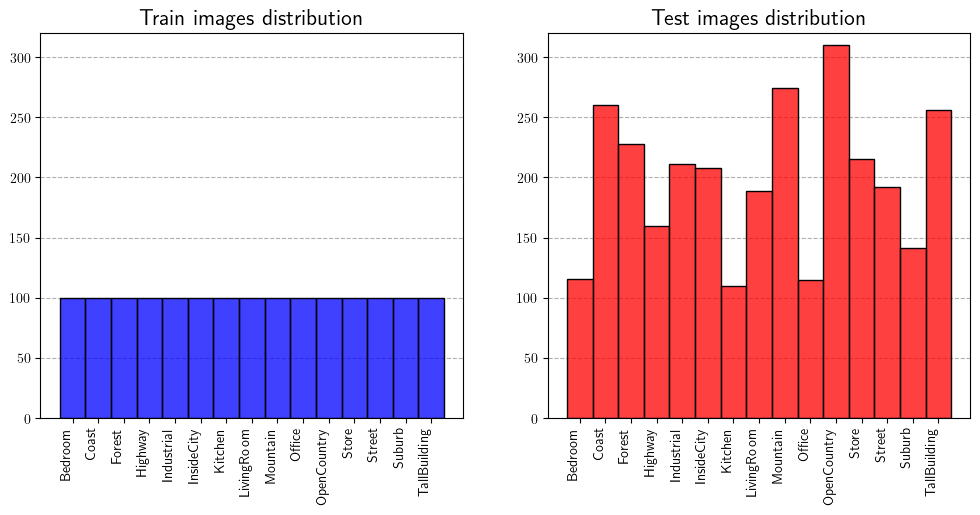

In [3]:
# Classes distribution plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(train_labels, bins=len(classes), ax=ax[0], color="blue", binrange=[0, len(classes)], binwidth=1, zorder=2)
ax[0].set_title("Train images distribution", fontsize=16)
ax[0].set_xticks([i + 0.5 for i in range(len(classes))])
ax[0].set_xticklabels(classes, rotation=90, ha='right')
ax[0].set_ylabel("")
ax[0].set_ylim(0, 320)
ax[0].grid(axis='y', linestyle='--', zorder=1)

sns.histplot(test_labels, bins=len(classes), ax=ax[1], color="red", binrange=[0, len(classes)], binwidth=1, zorder=2)
ax[1].set_title("Test images distribution", fontsize=16)
ax[1].set_xticks([i + 0.5 for i in range(len(classes))])
ax[1].set_xticklabels(classes, rotation=90, ha='right')
ax[1].set_ylabel("")
ax[1].set_ylim(0, 320)
ax[1].grid(axis='y', linestyle='--', zorder=1)

fig.savefig(os.path.join(IMAGE_DIR, "classes_distribution.pdf"), bbox_inches='tight')
plt.show()

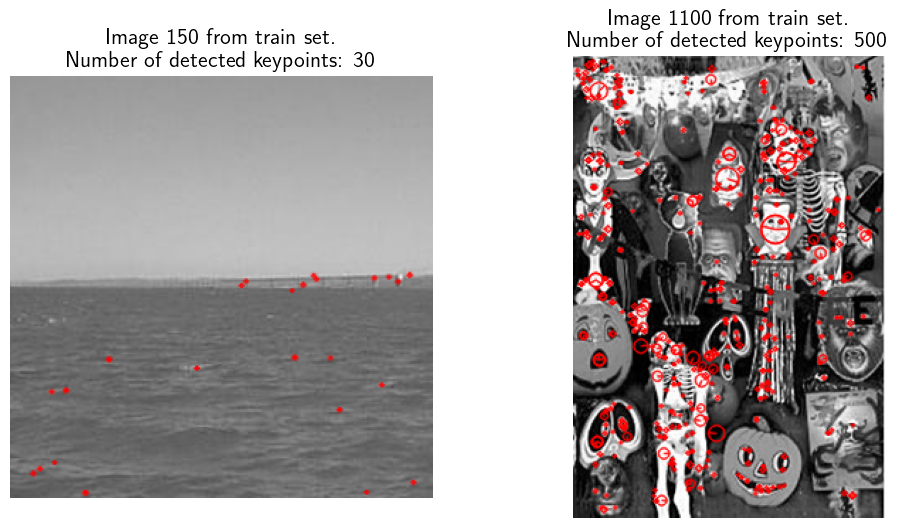

In [80]:
# Keypoints for 2 sample images
image1 = train_images[150]
image2 = train_images[1100]
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Draw keypoints on the images
image_keypoints1 = cv2.drawKeypoints(
	image1, 
	keypoints1, 
	outImage = None,
	color = (255, 0, 0),
	flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)
image_keypoints2 = cv2.drawKeypoints(
	image2,
	keypoints2,
	outImage = None,
	color = (255, 0, 0),
	flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image_keypoints1)
ax[0].set_title(f"Image {150} from train set.\nNumber of detected keypoints: {len(keypoints1)}", fontsize=16)
ax[0].axis("off")
ax[1].imshow(image_keypoints2)
ax[1].set_title(f"Image {1100} from train set.\nNumber of detected keypoints: {len(keypoints2)}", fontsize=16)
ax[1].axis("off")

fig.savefig(os.path.join(IMAGE_DIR, "keypoints.pdf"), bbox_inches='tight')
plt.show()

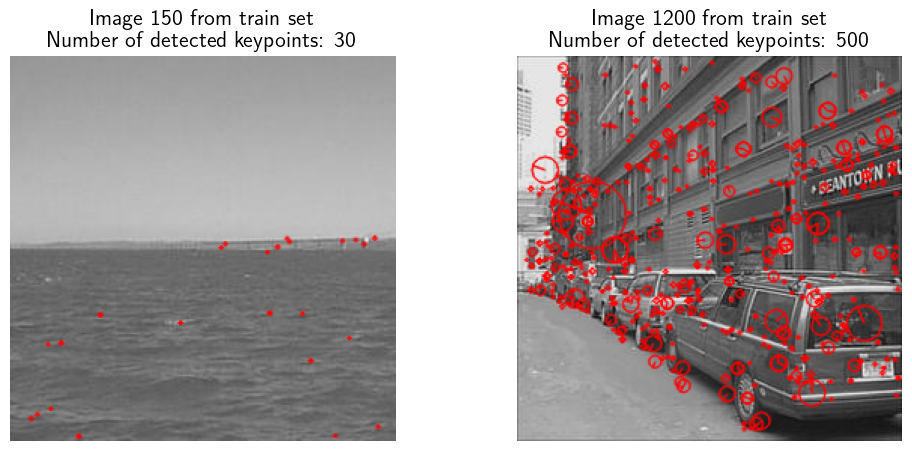

In [13]:
import cv2
import matplotlib.pyplot as plt
import os

# Function to resize images to the same height
def resize_to_same_height(image1, image2):
    height1, width1 = image1.shape[:2]
    height2, width2 = image2.shape[:2]
    
    # Determine the new height (minimum of the two heights)
    new_height = min(height1, height2)
    
    # Calculate the new width to maintain aspect ratio
    new_width1 = int((new_height / height1) * width1)
    new_width2 = int((new_height / height2) * width2)
    
    # Resize images
    resized_image1 = cv2.resize(image1, (new_width1, new_height))
    resized_image2 = cv2.resize(image2, (new_width2, new_height))
    
    return resized_image1, resized_image2

# Keypoints for 2 sample images
i1 = 150
i2 = 1200
image1 = train_images[i1]
image2 = train_images[i2]
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Draw keypoints on the images
image_keypoints1 = cv2.drawKeypoints(
    image1, 
    keypoints1, 
    outImage=None,
    color=(255, 0, 0),
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)
image_keypoints2 = cv2.drawKeypoints(
    image2,
    keypoints2,
    outImage=None,
    color=(255, 0, 0),
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# Resize images to the same height
image_keypoints1, image_keypoints2 = resize_to_same_height(image_keypoints1, image_keypoints2)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].imshow(image_keypoints1)
ax[0].set_title(f"Image {i1} from train set\nNumber of detected keypoints: {len(keypoints1)}", fontsize=16)
ax[0].axis("off")
ax[1].imshow(image_keypoints2)
ax[1].set_title(f"Image {i2} from train set\nNumber of detected keypoints: {len(keypoints2)}", fontsize=16)
ax[1].axis("off")

fig.savefig(os.path.join(IMAGE_DIR, "keypoints.pdf"), bbox_inches='tight')
plt.show()

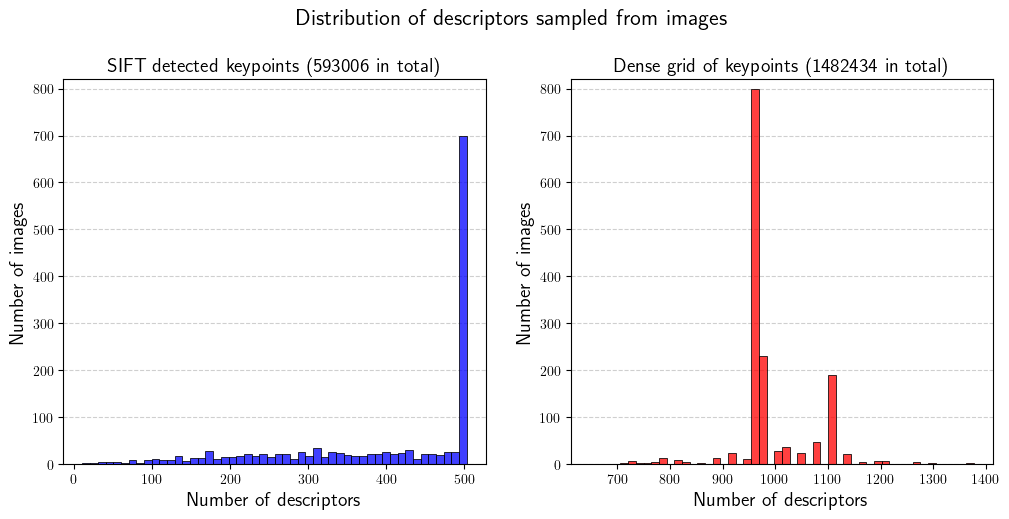

In [69]:
# Distributions of points sampled in images

# Count the number of descriptors per image
n_descriptors1 = [len(train_descriptors["detected"][i]) for i in range(len(train_images))]
n_descriptors2 = [len(train_descriptors["grid"][i]) for i in range(len(train_images))]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Distribution of descriptors sampled from images", fontsize=16, y=1.02)

sns.histplot(n_descriptors1, bins=50, ax=ax[0], color="blue", zorder=2)
ax[0].set_title(f"SIFT detected keypoints ({sum(n_descriptors1)} in total)", fontsize=14)
ax[0].set_xlabel("Number of descriptors", fontsize=14)
ax[0].set_ylabel("Number of images", fontsize=14)
ax[0].set_ylim(0, 820)
ax[0].grid(axis='y', linestyle='--', alpha=0.6, zorder=1)

sns.histplot(n_descriptors2, bins=50, ax=ax[1], color="red", zorder=2)
ax[1].set_title(f"Dense grid of keypoints ({sum(n_descriptors2)} in total)", fontsize=14)
ax[1].set_xlabel("Number of descriptors", fontsize=14)
ax[1].set_ylabel("Number of images", fontsize=14)
ax[1].set_ylim(0, 820)
ax[1].grid(axis='y', linestyle='--', alpha=0.6, zorder=1)

fig.savefig(os.path.join(IMAGE_DIR, "descriptors_distribution.pdf"), bbox_inches='tight')
plt.show()

In [4]:
# Silhouette analysis
K_values = np.arange(100, 1001, 50)

silhouette_scores1 = []
silhouette_scores2 = []

sample_descriptors1 = sample_descriptors["detected"]
sample_descriptors2 = sample_descriptors["grid"]

for _K_ in tqdm.tqdm(K_values, desc="Computing silhouette scores", leave=False):
    
    # Detected keypoints
    kmeans1 = KMeans(n_clusters=_K_, random_state=42)
    kmeans1.fit(sample_descriptors1)
    cluster_labels1 = kmeans1.predict(sample_descriptors1)
    silhouette_scores1.append(silhouette_score(sample_descriptors1, cluster_labels1))
    del kmeans1, cluster_labels1
    
    # Grid keypoints
    kmeans2 = KMeans(n_clusters=_K_, random_state=42)
    kmeans2.fit(sample_descriptors2)
    cluster_labels2 = kmeans2.predict(sample_descriptors2)
    silhouette_scores2.append(silhouette_score(sample_descriptors2, cluster_labels2))
    del kmeans2, cluster_labels2    

Computing silhouette scores:   0%|          | 0/19 [00:00<?, ?it/s]

In [5]:
# Save silhouette scores with pickle
# with open("silhouette_scores.pkl", "wb") as f:
# 	pickle.dump((K_values, silhouette_scores1, silhouette_scores2), f)
 
# Load silhouette scores
# with open("silhouette_scores.pkl", "rb") as f:
# 	K_values, silhouette_scores1, silhouette_scores2 = pickle.load(f)

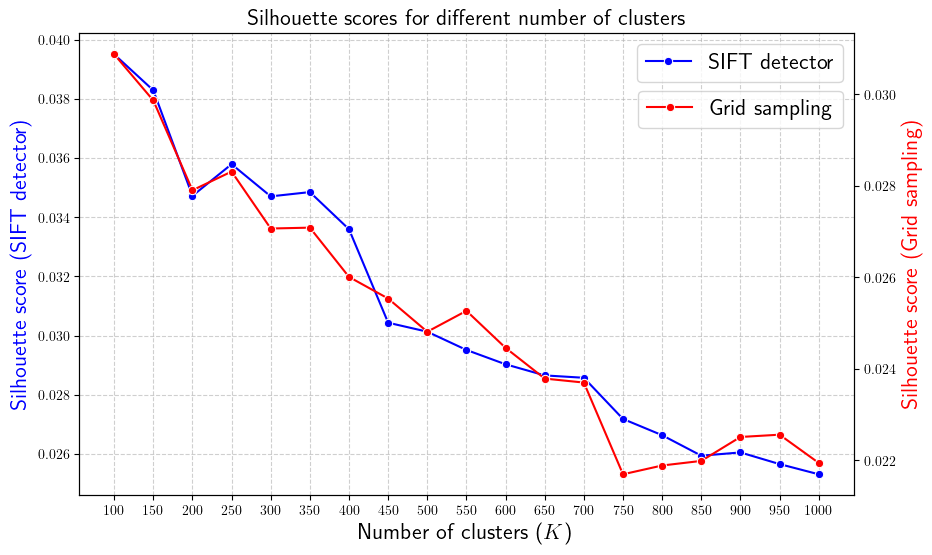

In [9]:
# Plot the silhouette scores
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.lineplot(x=K_values, y=silhouette_scores1, marker="o", color="blue", ax=ax1, label="SIFT detector")

ax2 = ax1.twinx()
sns.lineplot(x=K_values, y=silhouette_scores2, marker="o", color="red", ax=ax2, label="Grid sampling")

ax1.set_title("Silhouette scores for different number of clusters", fontsize=16)
ax1.set_xlabel("Number of clusters" r" ($K$)", fontsize=16)
ax1.set_ylabel("Silhouette score (SIFT detector)", color="blue", fontsize=16)
ax2.set_ylabel("Silhouette score (Grid sampling)", color="red", fontsize=16)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(loc="upper right", fontsize=16)
ax2.legend(loc="upper right", bbox_to_anchor=(1, 0.9), fontsize=16)
ax1.set_xticks(K_values)

fig.savefig(os.path.join(IMAGE_DIR, "silhouette_scores_comparison.pdf"), bbox_inches='tight')
plt.show() 

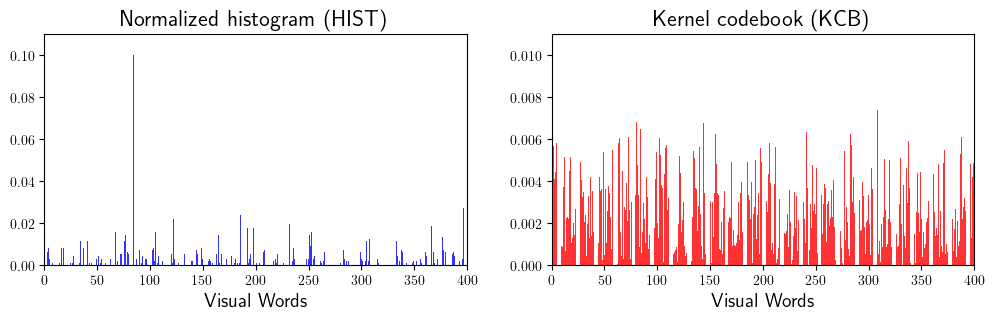

In [23]:
# Comparison between image representations
idx = 1200 # from train set

fig, ax = plt.subplots(1, 2, figsize=(12, 3))

# Normalized histogram
histogram_rep = train_histograms["grid"][idx]
ax[0].bar(range(K), histogram_rep, color="blue", alpha=0.8)
ax[0].set_title("Normalized histogram (HIST)", fontsize=16)
ax[0].set_xlabel("Visual Words", fontsize=14)
ax[0].set_ylabel("")
ax[0].set_xlim(0, K)
ax[0].set_ylim(0, 0.11)

# KCB
kcb_rep = train_kcb["grid"][idx]
ax[1].bar(range(K), kcb_rep, color="red", alpha=0.8)
ax[1].set_title("Kernel codebook (KCB)", fontsize=16)
ax[1].set_xlabel("Visual Words", fontsize=14)
ax[1].set_ylabel("")
ax[1].set_xlim(0, K)
ax[1].set_ylim(0, 0.011)

fig.savefig(os.path.join(IMAGE_DIR, "representations_comparison.pdf"), bbox_inches='tight')
plt.show()

In [14]:
# Features for confusion matrices
train = train_histograms["grid"]
test = test_histograms["grid"]

1-NN accuracy: 43.75%


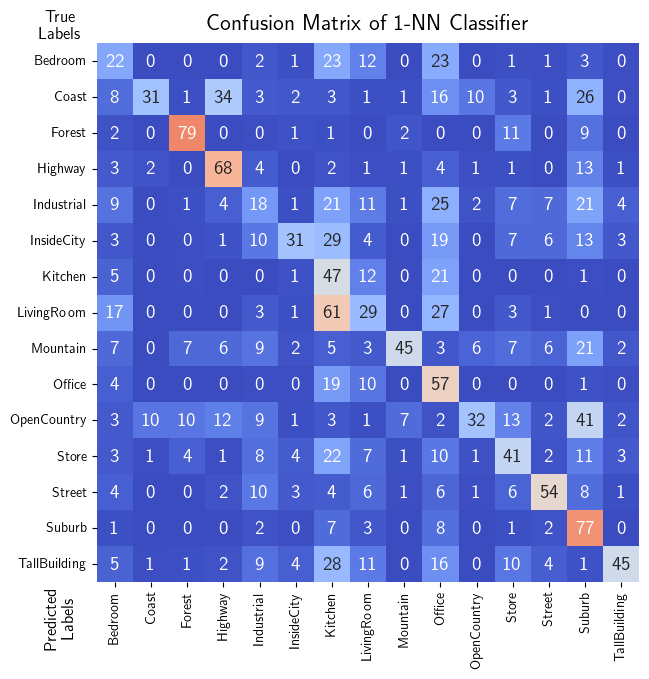

In [40]:
# 1-NN classifier
one_knn = KNeighborsClassifier(n_neighbors=1)
one_knn.fit(train, train_labels)
one_knn_predictions = one_knn.predict(test)
print(f"1-NN accuracy: {accuracy_score(test_labels, one_knn_predictions) * 100:.2f}%")

# KNN confusion matrix
conf_matrix = confusion_matrix(test_labels, one_knn_predictions)
conf_matrix = conf_matrix / np.sum(conf_matrix, axis=1)

# Plot
fig = plt.figure(figsize=(7, 7))
sns.heatmap(
	conf_matrix * 100,
	annot=True, 
	fmt='.0f', 
	vmin = 0,
	vmax = 100,
	cmap='coolwarm', 
	cbar=False,
	xticklabels=classes, 
	yticklabels=classes,
	annot_kws={"fontsize": 14}
)
# plt.xlabel('Predicted Labels', fontsize=16)
# plt.ylabel('True Labels', fontsize=16)
plt.text(-1, 16, 'Predicted\nLabels', ha='center', va='center', fontsize=12, rotation=90)
plt.text(-1, -0.5, 'True\nLabels', ha='center', va='center', fontsize=12)
plt.title('Confusion Matrix of 1-NN Classifier', fontsize=16, pad=10)

fig.savefig(os.path.join(IMAGE_DIR, "1nn_confusion_matrix.pdf"), bbox_inches='tight')
plt.show()

k-NN accuracy: 43.95% with k=5


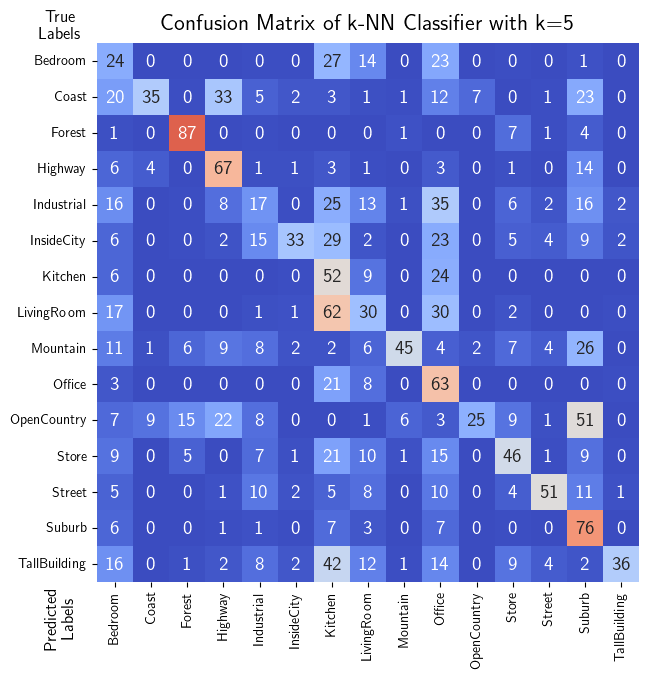

In [41]:
# Best k for k-NN
k_values = range(1, 51)
accuracies = []
for k_ in k_values:
	knn = KNeighborsClassifier(n_neighbors=k_)
	knn.fit(train, train_labels)
	predictions = knn.predict(test)
	accuracy = accuracy_score(test_labels, predictions)
	accuracies.append(accuracy)
best_k = k_values[np.argmax(accuracies)]

# KNN classifier
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(train, train_labels)
predictions = knn.predict(test)
print(f"k-NN accuracy: {accuracy_score(test_labels, predictions) * 100:.2f}% with k={best_k}")

# KNN confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)
conf_matrix = conf_matrix / np.sum(conf_matrix, axis=1)

# Plot
fig = plt.figure(figsize=(7, 7))
sns.heatmap(
	conf_matrix * 100,
	annot=True, 
	fmt='.0f', 
	vmin = 0,
	vmax = 100,
	cmap='coolwarm', 
	cbar=False,
	xticklabels=classes, 
	yticklabels=classes,
	annot_kws={"fontsize": 14}
)
plt.text(-1, 16, 'Predicted\nLabels', ha='center', va='center', fontsize=12, rotation=90)
plt.text(-1, -0.5, 'True\nLabels', ha='center', va='center', fontsize=12)
plt.title(f'Confusion Matrix of k-NN Classifier with k={best_k}', fontsize=16, pad=10)

fig.savefig(os.path.join(IMAGE_DIR, "knn_confusion_matrix.pdf"), bbox_inches='tight')
plt.show()

SVM (RBF) accuracy: 66.43%


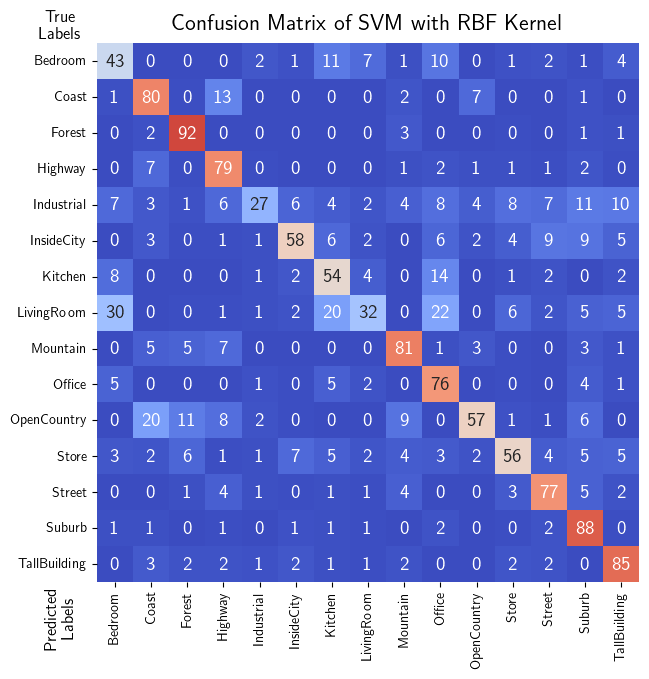

In [42]:
# SVM with RBF kernel
SVMs = []
for target_label in set(train_labels):
	one_vs_all_labels = [1 if label == target_label else -1 for label in train_labels]
	svm = SVC(probability=True, C=1.0, kernel='rbf')
	svm.fit(train, one_vs_all_labels)
	SVMs.append(svm)
predictions = np.array([svm.decision_function(test) for svm in SVMs])
predictions = np.argmax(predictions, axis=0)
print(f"SVM (RBF) accuracy: {accuracy_score(test_labels, predictions) * 100:.2f}%")

# SVM with RBF kernel confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)
conf_matrix = conf_matrix / np.sum(conf_matrix, axis=1)

# Plot
fig = plt.figure(figsize=(7, 7))
sns.heatmap(
	conf_matrix * 100,
	annot=True, 
	fmt='.0f', 
	vmin = 0,
	vmax = 100,
	cmap='coolwarm', 
	cbar=False,
	xticklabels=classes, 
	yticklabels=classes,
	annot_kws={"fontsize": 14}
)
plt.text(-1, 16, 'Predicted\nLabels', ha='center', va='center', fontsize=12, rotation=90)
plt.text(-1, -0.5, 'True\nLabels', ha='center', va='center', fontsize=12)
plt.title('Confusion Matrix of SVM with RBF Kernel', fontsize=16, pad=10)

fig.savefig(os.path.join(IMAGE_DIR, "svm_rbf_confusion_matrix.pdf"), bbox_inches='tight')
plt.show()

SVM (chi2) accuracy: 71.42%


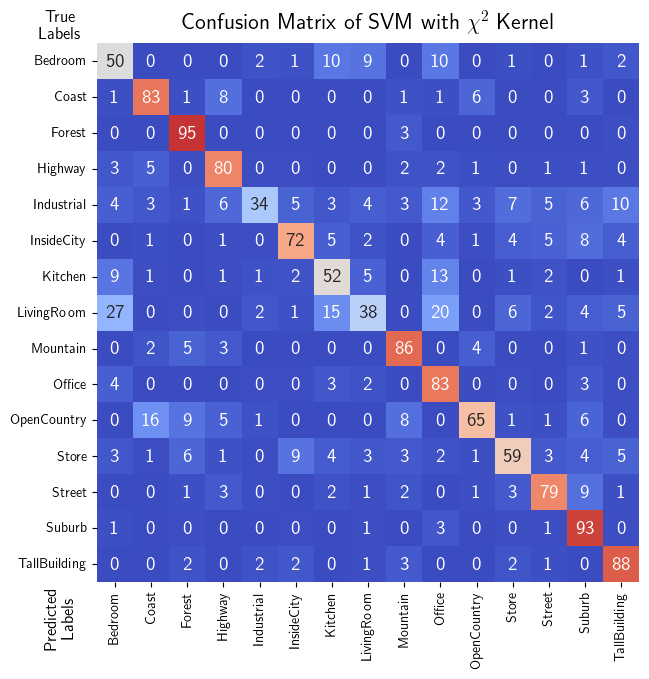

In [45]:
# SVM with chi2 kernel
train_gram = chi2_kernel(train_histograms["grid"], train_histograms["grid"])
test_gram = chi2_kernel(test_histograms["grid"], train_histograms["grid"])
SVMs = []
for target_label in set(train_labels):
	one_vs_all_labels = [1 if label == target_label else -1 for label in train_labels]
	svm = SVC(probability=True, C=1.0, kernel='precomputed')
	svm.fit(train_gram, one_vs_all_labels)
	SVMs.append(svm)
predictions = np.array([svm.decision_function(test_gram) for svm in SVMs])
predictions = np.argmax(predictions, axis=0)
print(f"SVM (chi2) accuracy: {accuracy_score(test_labels, predictions) * 100:.2f}%")

# SVM with chi2 kernel confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)
conf_matrix = conf_matrix / np.sum(conf_matrix, axis=1)

# Plot
fig = plt.figure(figsize=(7, 7))
sns.heatmap(
	conf_matrix * 100,
	annot=True, 
	fmt='.0f', 
	vmin = 0,
	vmax = 100,
	cmap='coolwarm', 
	cbar=False,
	xticklabels=classes, 
	yticklabels=classes,
	annot_kws={"fontsize": 14}
)
plt.text(-1, 16, 'Predicted\nLabels', ha='center', va='center', fontsize=12, rotation=90)
plt.text(-1, -0.5, 'True\nLabels', ha='center', va='center', fontsize=12)
plt.title('Confusion Matrix of SVM with ' r'$\chi^2$' ' Kernel', fontsize=16, pad=10)

fig.savefig(os.path.join(IMAGE_DIR, "svm_chi2_confusion_matrix.pdf"), bbox_inches='tight')
plt.show()

SVM (intersection) accuracy: 70.62%


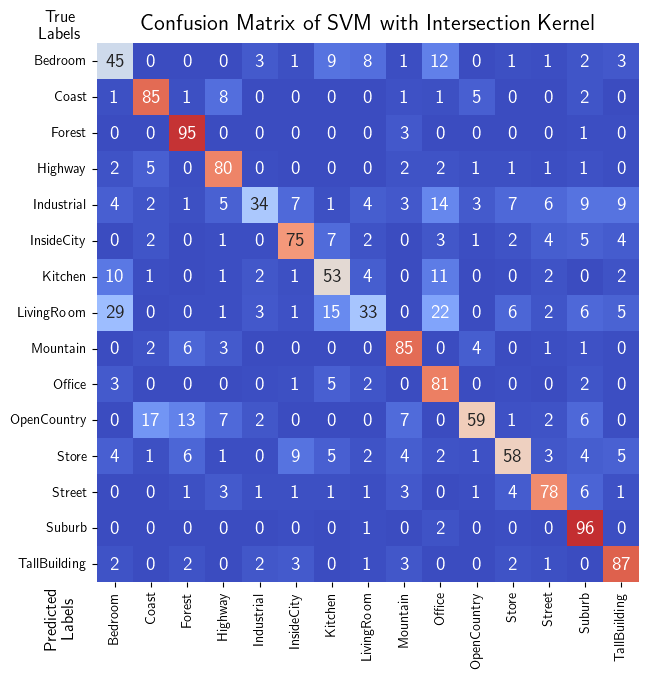

In [46]:
# SVM with intersection kernel
train_gram = intersection_kernel(train_histograms["grid"], train_histograms["grid"])
test_gram = intersection_kernel(test_histograms["grid"], train_histograms["grid"])
SVMs = []
for target_label in set(train_labels):
	one_vs_all_labels = [1 if label == target_label else -1 for label in train_labels]
	svm = SVC(probability=True, C=1.0, kernel='precomputed')
	svm.fit(train_gram, one_vs_all_labels)
	SVMs.append(svm)
predictions = np.array([svm.decision_function(test_gram) for svm in SVMs])
predictions = np.argmax(predictions, axis=0)
print(f"SVM (intersection) accuracy: {accuracy_score(test_labels, predictions) * 100:.2f}%")

# SVM with intersection kernel confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)
conf_matrix = conf_matrix / np.sum(conf_matrix, axis=1)

# Plot
fig = plt.figure(figsize=(7, 7))
sns.heatmap(
	conf_matrix * 100,
	annot=True, 
	fmt='.0f', 
	vmin = 0,
	vmax = 100,
	cmap='coolwarm', 
	cbar=False,
	xticklabels=classes, 
	yticklabels=classes,
	annot_kws={"fontsize": 14}
)
plt.text(-1, 16, 'Predicted\nLabels', ha='center', va='center', fontsize=12, rotation=90)
plt.text(-1, -0.5, 'True\nLabels', ha='center', va='center', fontsize=12)
plt.title('Confusion Matrix of SVM with Intersection Kernel', fontsize=16, pad=10)

fig.savefig(os.path.join(IMAGE_DIR, "svm_intersection_confusion_matrix.pdf"), bbox_inches='tight')
plt.show()

SVM (pyramid) accuracy: 75.54%


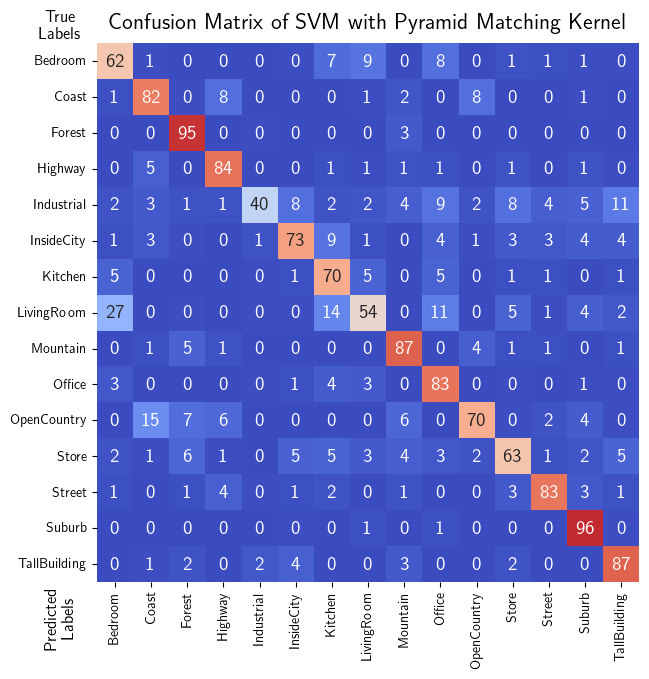

In [49]:
# SVM with pyramid matching kernel
train_gram = intersection_kernel(train_pyramid["grid"], train_pyramid["grid"])
test_gram = intersection_kernel(test_pyramid["grid"], train_pyramid["grid"])
SVMs = []
for target_label in set(train_labels):
	one_vs_all_labels = [1 if label == target_label else -1 for label in train_labels]
	svm = SVC(probability=True, C=1.0, kernel='precomputed')
	svm.fit(train_gram, one_vs_all_labels)
	SVMs.append(svm)
predictions = np.array([svm.decision_function(test_gram) for svm in SVMs])
predictions = np.argmax(predictions, axis=0)
print(f"SVM (pyramid) accuracy: {accuracy_score(test_labels, predictions) * 100:.2f}%")

# SVM with pyramid matching kernel confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)
conf_matrix = conf_matrix / np.sum(conf_matrix, axis=1)

# Plot
fig = plt.figure(figsize=(7, 7))
sns.heatmap(
	conf_matrix * 100,
	annot=True, 
	fmt='.0f', 
	vmin = 0,
	vmax = 100,
	cmap='coolwarm', 
	cbar=False,
	xticklabels=classes, 
	yticklabels=classes,
	annot_kws={"fontsize": 14}
)
plt.text(-1, 16, 'Predicted\nLabels', ha='center', va='center', fontsize=12, rotation=90)
plt.text(-1, -0.5, 'True\nLabels', ha='center', va='center', fontsize=12)
plt.title('Confusion Matrix of SVM with Pyramid Matching Kernel', fontsize=16, pad=10)

fig.savefig(os.path.join(IMAGE_DIR, "svm_pyramid_confusion_matrix.pdf"), bbox_inches='tight')
plt.show()

## Other Experiments

In [4]:
trainDescriptors = train_descriptors["grid"]
testDescriptors = []
spacing = 8
for image in tqdm.tqdm(test_images, desc="Computing descriptors", leave=False):
	height, width = image.shape[:2]
	keypoints = [
		cv2.KeyPoint(float(x), float(y), float(spacing))
		for y in range(spacing, height, spacing)
		for x in range(spacing, width, spacing)
	]
	_, image_descriptors = sift.compute(image, keypoints)
	image_descriptors = np.array(image_descriptors)
	testDescriptors.append(image_descriptors)

Computing descriptors:   0%|          | 0/2985 [00:00<?, ?it/s]

In [8]:
# For each descriptor in the train set, predict it's cluster and compute the distance to the cluster center
# For each centroid save only the maximum distance as an approximation of the cluster radius
radius = np.zeros(K)
centroids = kmeans["grid"].cluster_centers_
for descriptor in tqdm.tqdm(descriptors["grid"], desc="Computing cluster radius", leave=False):
	label = kmeans["grid"].predict(descriptor.reshape(1, -1))[0]
	distance = np.linalg.norm(descriptor - centroids[label])
	radius[label] = max(radius[label], distance)


# # For each descriptor in the train set, predict it's cluster and compute the distance to the cluster center
# # then compute the average distance to the cluster center as the cluster radius
# radius = np.zeros(K)
# counts = np.zeros(K)
# centroids = kmeans["grid"].cluster_centers_
# for descriptor in tqdm.tqdm(descriptors["grid"], desc="Computing cluster radius", leave=False):
# 	label = kmeans["grid"].predict(descriptor.reshape(1, -1))[0]
# 	distance = np.linalg.norm(descriptor - centroids[label])
# 	radius[label] += distance
# 	counts[label] += 1
# radius = radius / counts

Computing cluster radius:   0%|          | 0/1482434 [00:00<?, ?it/s]

In [9]:
print(np.min(radius), np.mean(radius), np.max(radius))

# # Substituteall radius components with the mean radius
# radius = 325 * np.ones(K)

344.1327209472656 418.9023918914795 538.227294921875


In [6]:
def evaluate_SVM(train, test, train_labels, test_labels, kernel='rbf'):
	SVMs = []
	for target_label in set(train_labels):
		one_vs_all_labels = [1 if label == target_label else -1 for label in train_labels]
		svm = SVC(probability=True, C=1.0, kernel=kernel)
		svm.fit(train, one_vs_all_labels)
		SVMs.append(svm)
	predictions = np.array([svm.decision_function(test) for svm in SVMs])
	predictions = np.argmax(predictions, axis=0)
	accuracy = accuracy_score(test_labels, predictions)
	return accuracy

In [41]:
# sigma = 200
# image0Descriptors = trainDescriptors[0]
# # image0Descriptors.shape

# gaussian_kernel = (1.0 / np.sqrt(2 * np.pi * sigma**2)) * rbf_kernel(centroids, image0Descriptors, gamma=1 / (2 * sigma**2))
# # gaussian_kernel.shape

# distances = np.array([np.linalg.norm(image0Descriptors - word, axis=1) for word in centroids])
# # distances.shape

# # For each row in the distances matrix, set to zero the values that are greater than the cluster radius for the corresponding centroid
# region_size = np.zeros(K)
# for kidx in range(K):
#     # Set to zero all the ones outside
# 	distances[kidx][distances[kidx] > radius[kidx]] = 0
	
# 	# Set to one all the ones inside
# 	distances[kidx][distances[kidx] != 0] = 1
 
# 	# Compute the region size
# 	region_size[kidx] = np.sum(distances[kidx]) + 1e-6
 
# # print(distances[399], radius[399])

# # Apply the distances masking to the gaussian kernel
# masked_gaussian_kernel = gaussian_kernel * distances

# # Divide each row by the corresponding region size
# region_size = region_size.reshape(-1, 1)
# masked_gaussian_kernel /= region_size

# # region_size.shape

# masked_gaussian_kernel.shape



(400, 792)

In [38]:
# import numpy as np

# # Example matrix
# matrix = np.array([[2, 4, 6],
#                    [8, 10, 12],
#                    [14, 16, 18]])

# # Column vector (denominators)
# denominators = np.array([2, 4, 6]).reshape(-1, 1)

# print(denominators.shape)

# # Divide each element in the rows of the matrix by the corresponding denominator
# result = matrix / denominators

# print(result)

(3, 1)
[[1.         2.         3.        ]
 [2.         2.5        3.        ]
 [2.33333333 2.66666667 3.        ]]


In [10]:
# Compute the kernel codebook representation
TrainKCB = []

sigma = 200
centroids = kmeans["grid"].cluster_centers_

# For each image, compute the kernel codebook representation
for tdescriptors in tqdm.tqdm(
	trainDescriptors,
	desc="Computing KCB representations for train set",
	leave=False
):
	# n = len(tdescriptors)
	# gaussian_kernel = (1.0 / np.sqrt(2 * np.pi * sigma**2)) * rbf_kernel(centroids, tdescriptors, gamma=1 / (2 * sigma**2))
	# image_kcb = np.sum(gaussian_kernel, axis=1)

	# More efficient one (?)
	# gaussian_kernel = (1.0 / np.sqrt(2 * np.pi * sigma**2)) * rbf_kernel(centroids, tdescriptors, gamma=1 / (2 * sigma**2))
	gaussian_kernel = rbf_kernel(centroids, tdescriptors, gamma=1 / (2 * sigma**2))
	distances = np.array([np.linalg.norm(tdescriptors - word, axis=1) for word in centroids])
	# region_size = np.zeros(K)
	for kidx in range(K):
		distances[kidx][distances[kidx] > radius[kidx]] = 0
		distances[kidx][distances[kidx] != 0] = 1
		# region_size[kidx] = np.sum(distances[kidx]) + 1e-6
	
	gaussian_kernel = gaussian_kernel * distances
	# region_size = region_size.reshape(-1, 1)
	# gaussian_kernel /= region_size
	image_kcb = np.sum(gaussian_kernel, axis=1)
	image_kcb /= np.sum(image_kcb)
	TrainKCB.append(image_kcb)


Computing KCB representations for train set:   0%|          | 0/1500 [00:00<?, ?it/s]

In [11]:
TestKCB = []
for tdescriptors in tqdm.tqdm(
	testDescriptors,
	desc="Computing KCB representations for test set",
	leave=False
):

	# Initial one:
	# n = len(tdescriptors)
	# gaussian_kernel = (1.0 / np.sqrt(2 * np.pi * sigma**2)) * rbf_kernel(centroids, tdescriptors, gamma=1 / (2 * sigma**2))
	# image_kcb = np.sum(filtered_gaussian_kernel, axis=1)
	# TestKCB.append(image_kcb)
 

	# Good idea but too inefficient
	# image_kcb = np.zeros(K, dtype=np.float32)
 
	# # For each centroid compute the gaussian kernel
	# for kidx in range(K):
	 
	# 	centroid_kcb = 0
	# 	region_size = 0
		
	# 	# Find which descriptors are inside the centroid radius
	# 	for descriptor in tdescriptors:
	# 		distance = np.linalg.norm(descriptor - centroids[kidx])
	# 		if distance <= radius[kidx]:
	# 			centroid_kcb += (1.0 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-distance**2 / (2 * sigma**2))
	# 			region_size += 1
  
	# 	if region_size > 0:
	# 		image_kcb[kidx] = centroid_kcb / region_size
  
	# image_kcb = np.array(image_kcb)
	# TestKCB.append(image_kcb)


	# More efficient one (?)
	# gaussian_kernel = (1.0 / np.sqrt(2 * np.pi * sigma**2)) * rbf_kernel(centroids, tdescriptors, gamma=1 / (2 * sigma**2))
	gaussian_kernel = rbf_kernel(centroids, tdescriptors, gamma=1 / (2 * sigma**2))
	distances = np.array([np.linalg.norm(tdescriptors - word, axis=1) for word in centroids])
	# region_size = np.zeros(K)
	for kidx in range(K):
		distances[kidx][distances[kidx] > radius[kidx]] = 0
		distances[kidx][distances[kidx] != 0] = 1
		# region_size[kidx] = np.sum(distances[kidx]) + 1e-6
	
	gaussian_kernel = gaussian_kernel * distances
	# region_size = region_size.reshape(-1, 1)
	# gaussian_kernel /= region_size
	image_kcb = np.sum(gaussian_kernel, axis=1)
	image_kcb /= np.sum(image_kcb)
	TestKCB.append(image_kcb)

Computing KCB representations for test set:   0%|          | 0/2985 [00:00<?, ?it/s]

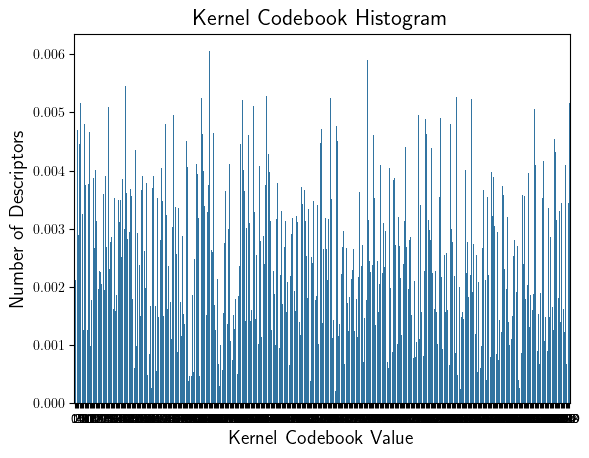

NameError: name 'train_histograms' is not defined

In [12]:
# KCB
sns.barplot(x=range(TrainKCB[0].shape[0]), y=TrainKCB[0])
plt.title("Kernel Codebook Histogram", fontsize=16)
plt.xlabel("Kernel Codebook Value", fontsize=14)
plt.ylabel("Number of Descriptors", fontsize=14)
plt.show()

# Normalized histograms
sns.barplot(x=range(train_histograms["grid"][0].shape[0]), y=train_histograms["grid"][0], color = "blue")
plt.title("Normalized Histogram", fontsize=16)
plt.xlabel("Bin", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

In [13]:
# Evaluate
accuracy = evaluate_SVM(TrainKCB, TestKCB, train_labels, test_labels, kernel='rbf')
print(accuracy)


0.6087102177554439


In [14]:
train_gram = chi2_kernel(np.array(TrainKCB), np.array(TrainKCB))
test_gram = chi2_kernel(np.array(TestKCB), np.array(TrainKCB))
accuracy = evaluate_SVM(train_gram, test_gram, train_labels, test_labels, kernel='precomputed')
print(accuracy)

0.6003350083752094


In [15]:
train_gram = intersection_kernel(np.array(TrainKCB), np.array(TrainKCB))
test_gram = intersection_kernel(np.array(TestKCB), np.array(TrainKCB))
accuracy = evaluate_SVM(train_gram, test_gram, train_labels, test_labels, kernel='precomputed')
print(accuracy)

0.6033500837520938


In [32]:
accuracy = evaluate_SVM(train_histograms["grid"], test_histograms["grid"], train_labels, test_labels, kernel='rbf')
print(accuracy)

0.664321608040201


In [33]:
train_gram = chi2_kernel(train_histograms["grid"], train_histograms["grid"])
test_gram = chi2_kernel(test_histograms["grid"], train_histograms["grid"])
accuracy = evaluate_SVM(train_gram, test_gram, train_labels, test_labels, kernel='precomputed')
print(accuracy)

0.7142378559463987


In [34]:
train_gram = intersection_kernel(train_histograms["grid"], train_histograms["grid"])
test_gram = intersection_kernel(test_histograms["grid"], train_histograms["grid"])
accuracy = evaluate_SVM(train_gram, test_gram, train_labels, test_labels, kernel='precomputed')
print(accuracy)

0.7061976549413735


***

In [18]:
# For each descriptor in the train set, predict it's cluster and compute the distance to the cluster center
# For each centroid save only the maximum distance as an approximation of the cluster radius
radius = {
	"detected": np.zeros(K),
	"grid": np.zeros(K)
}

# Detected case
centroids = kmeans["detected"].cluster_centers_
for descriptor in tqdm.tqdm(descriptors["detected"], desc="Computing cluster radius detected case", leave=False):
	label = kmeans["detected"].predict(descriptor.reshape(1, -1))[0]
	distance = np.linalg.norm(descriptor - centroids[label])
	radius["detected"][label] = max(radius["detected"][label], distance)

# Grid case
centroids = kmeans["grid"].cluster_centers_
for descriptor in tqdm.tqdm(descriptors["grid"], desc="Computing cluster radius grid case", leave=False):
	label = kmeans["grid"].predict(descriptor.reshape(1, -1))[0]
	distance = np.linalg.norm(descriptor - centroids[label])
	radius["grid"][label] = max(radius["grid"][label], distance)

Computing cluster radius detected case:   0%|          | 0/593006 [00:00<?, ?it/s]

Computing cluster radius grid case:   0%|          | 0/1482434 [00:00<?, ?it/s]

In [21]:
# Kernel codebook representation
def kcb(images, sift, kmeans, radius, grid=False, spacing=8, sigma=200):

	# Initialize variables
	kcb_representation = []
	K = kmeans.n_clusters
	centroids = kmeans.cluster_centers_
 
	# For each image, compute the kernel codebook representation
	for image in tqdm.tqdm(
		images,
		desc="Computing KCB representations",
		leave=False
	):
		if grid:
			height, width = image.shape[:2]
			keypoints = [
				cv2.KeyPoint(float(x), float(y), float(spacing))
				for y in range(spacing, height, spacing)
				for x in range(spacing, width, spacing)
			]
			_, descriptors = sift.compute(image, keypoints)
		else:
			_, descriptors = sift.detectAndCompute(image, None)     

		gaussian_kernel = rbf_kernel(centroids, descriptors, gamma=1 / (2*sigma**2))
		distances = np.array([np.linalg.norm(descriptors - word, axis=1) for word in centroids])
		for kidx in range(K):
			distances[kidx][distances[kidx] > radius[kidx]] = 0
			distances[kidx][distances[kidx] != 0] = 1
		gaussian_kernel = gaussian_kernel * distances
		image_kcb = np.sum(gaussian_kernel, axis=1)
		image_kcb /= np.sum(image_kcb)
		kcb_representation.append(image_kcb)
  
	return np.array(kcb_representation)


# Codeword uncertainty representation
def unc(images, sift, kmeans, radius, grid=False, spacing=8, sigma=200):

	# Initialize variables
	unc_representation = []
	K = kmeans.n_clusters
	centroids = kmeans.cluster_centers_
 
	# For each image, compute the kernel codebook representation
	for image in tqdm.tqdm(
		images,
		desc="Computing UNC representations",
		leave=False
	):
		if grid:
			height, width = image.shape[:2]
			keypoints = [
				cv2.KeyPoint(float(x), float(y), float(spacing))
				for y in range(spacing, height, spacing)
				for x in range(spacing, width, spacing)
			]
			_, descriptors = sift.compute(image, keypoints)
		else:
			_, descriptors = sift.detectAndCompute(image, None)     
     
		n = len(descriptors)
		gaussian_kernel = rbf_kernel(centroids, descriptors, gamma = 1 / (2*sigma**2))
		distances = np.array([np.linalg.norm(descriptors - word, axis=1) for word in centroids])
		for kidx in range(K):
			distances[kidx][distances[kidx] > radius[kidx]] = 0
			distances[kidx][distances[kidx] != 0] = 1
		gaussian_kernel = gaussian_kernel * distances
		kernel_normlization = np.sum(gaussian_kernel, axis=0)
		gaussian_kernel = gaussian_kernel / (kernel_normlization + 1e-6)
		image_unc = np.sum(gaussian_kernel, axis=1)
		image_unc = image_unc / np.sum(image_unc)
		unc_representation.append(image_unc)
  
	return np.array(unc_representation)


# Codeword plausibility representation
def pla(images, sift, kmeans, radius, grid=False, spacing=8, sigma=200):
	
	# Initialize variables
	pla_representation = []
	K = kmeans.n_clusters
	centroids = kmeans.cluster_centers_

	# For each image, compute the kernel codebook representation
	for image in tqdm.tqdm(
		images,
		desc="Computing PLA representations",
		leave=False
	):
		if grid:
			height, width = image.shape[:2]
			keypoints = [
				cv2.KeyPoint(float(x), float(y), float(spacing))
				for y in range(spacing, height, spacing)
				for x in range(spacing, width, spacing)
			]
			_, descriptors = sift.compute(image, keypoints)
		else:
			_, descriptors = sift.detectAndCompute(image, None)     
     
		gaussian_kernel = rbf_kernel(centroids, descriptors, gamma = 1 / (2*sigma**2))
		distances = np.array([np.linalg.norm(descriptors - word, axis=1) for word in centroids])
		mask = np.zeros((len(centroids), len(descriptors)))
		for i in range(len(centroids)): mask[i, np.argmin(distances[i])] = 1
		gaussian_kernel = gaussian_kernel * mask
		image_pla = np.sum(gaussian_kernel, axis=1)
		image_pla = image_pla / np.sum(image_pla)
		pla_representation.append(image_pla)
  
	return np.array(pla_representation)

In [22]:
# Codeword uncertainty representation
LOAD = False
SAVE = True
if not LOAD:
	train_unc = {
		"detected": unc(train_images, sift, kmeans["detected"], radius["detected"]),
		"grid": unc(train_images, sift, kmeans["grid"], radius["grid"], grid=True)
	}
	test_unc = {
		"detected": unc(test_images, sift, kmeans["detected"], radius["detected"]),
		"grid": unc(test_images, sift, kmeans["grid"], radius["grid"], grid=True)
	}
 
	if SAVE:
		with open("train_unc2.pkl", "wb") as f:
			pickle.dump(train_unc, f)

		with open("test_unc2.pkl", "wb") as f:
			pickle.dump(test_unc, f)
else:
	with open("train_unc2.pkl", "rb") as f:
		train_unc = pickle.load(f)

	with open("test_unc2.pkl", "rb") as f:
		test_unc = pickle.load(f)

Computing UNC representations:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing UNC representations:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing UNC representations:   0%|          | 0/2985 [00:00<?, ?it/s]

Computing UNC representations:   0%|          | 0/2985 [00:00<?, ?it/s]

In [5]:
# Kernel codebook representation
if not LOAD:
	train_kcb = {
		"detected": kcb(train_images, sift, kmeans["detected"], radius["detected"]),
		"grid": kcb(train_images, sift, kmeans["grid"], radius["grid"], grid=True)
	}
	test_kcb = {
		"detected": kcb(test_images, sift, kmeans["detected"], radius["detected"]),
		"grid": kcb(test_images, sift, kmeans["grid"], radius["grid"], grid=True)
	}
 
	if SAVE:
		with open("train_kcb2.pkl", "wb") as f:
			pickle.dump(train_kcb, f)

		with open("test_kcb2.pkl", "wb") as f:
			pickle.dump(test_kcb, f)
else:
	with open("train_kcb2.pkl", "rb") as f:
		train_kcb = pickle.load(f)
  
	with open("test_kcb2.pkl", "rb") as f:
		test_kcb = pickle.load(f)

In [24]:
# Codeword plausibility representation
if not LOAD:
	train_pla = {
		"detected": pla(train_images, sift, kmeans["detected"], radius["detected"]),
		"grid": pla(train_images, sift, kmeans["grid"], radius["grid"], grid=True)
	}
	test_pla = {
		"detected": pla(test_images, sift, kmeans["detected"], radius["detected"]),
		"grid": pla(test_images, sift, kmeans["grid"], radius["grid"], grid=True)
	}
 
	if SAVE:
		with open("train_pla2.pkl", "wb") as f:
			pickle.dump(train_pla, f)

		with open("test_pla2.pkl", "wb") as f:
			pickle.dump(test_pla, f)
else:
	with open("train_pla2.pkl", "rb") as f:
		train_pla = pickle.load(f)
  
	with open("test_pla2.pkl", "rb") as f:
		test_pla = pickle.load(f)

Computing PLA representations:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing PLA representations:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing PLA representations:   0%|          | 0/2985 [00:00<?, ?it/s]

Computing PLA representations:   0%|          | 0/2985 [00:00<?, ?it/s]

In [27]:
# Test all 

print(f"Classifier".ljust(20), f"|\tRepresentation".ljust(30), f"|\tDetected".ljust(20), f"|\tGrid".ljust(20))

# SVM with RBF kernel
print("-" * 100)

# KCB
result_string = f"SVM (RBF)".ljust(20) + f"|\tKernel Codebook".ljust(30)
accuracy = evaluate_SVM(train_kcb["detected"], test_kcb["detected"], train_labels, test_labels, kernel='rbf')
result_string += f"|\t{100*accuracy:.2f}%".ljust(20)
accuracy = evaluate_SVM(train_kcb["grid"], test_kcb["grid"], train_labels, test_labels, kernel='rbf')
result_string += f"|\t{100*accuracy:.2f}%".ljust(20)
print(result_string)

# UNC
result_string = f"SVM (RBF)".ljust(20) + f"|\tUncertainty".ljust(30)
accuracy = evaluate_SVM(train_unc["detected"], test_unc["detected"], train_labels, test_labels, kernel='rbf')
result_string += f"|\t{100*accuracy:.2f}%".ljust(20)
accuracy = evaluate_SVM(train_unc["grid"], test_unc["grid"], train_labels, test_labels, kernel='rbf')
result_string += f"|\t{100*accuracy:.2f}%".ljust(20)
print(result_string)

# PLA
result_string = f"SVM (RBF)".ljust(20) + f"|\tPlausibility".ljust(30)
accuracy = evaluate_SVM(train_pla["detected"], test_pla["detected"], train_labels, test_labels, kernel='rbf')
result_string += f"|\t{100*accuracy:.2f}%".ljust(20)
accuracy = evaluate_SVM(train_pla["grid"], test_pla["grid"], train_labels, test_labels, kernel='rbf')
result_string += f"|\t{100*accuracy:.2f}%".ljust(20)
print(result_string)

# SVM with chi2 kernel
print("-" * 100)

# KCB
result_string = f"SVM (chi2)".ljust(20) + f"|\tKernel Codebook".ljust(30)
train_gram = chi2_kernel(train_kcb["detected"], train_kcb["detected"])
test_gram = chi2_kernel(test_kcb["detected"], train_kcb["detected"])
accuracy = evaluate_SVM(train_gram, test_gram, train_labels, test_labels, kernel='precomputed')
result_string += f"|\t{100*accuracy:.2f}%".ljust(20)
train_gram = chi2_kernel(train_kcb["grid"], train_kcb["grid"])
test_gram = chi2_kernel(test_kcb["grid"], train_kcb["grid"])
accuracy = evaluate_SVM(train_gram, test_gram, train_labels, test_labels, kernel='precomputed')
result_string += f"|\t{100*accuracy:.2f}%".ljust(20)
print(result_string)

# UNC
result_string = f"SVM (chi2)".ljust(20) + f"|\tUncertainty".ljust(30)
train_gram = chi2_kernel(train_unc["detected"], train_unc["detected"])
test_gram = chi2_kernel(test_unc["detected"], train_unc["detected"])
accuracy = evaluate_SVM(train_gram, test_gram, train_labels, test_labels, kernel='precomputed')
result_string += f"|\t{100*accuracy:.2f}%".ljust(20)
train_gram = chi2_kernel(train_unc["grid"], train_unc["grid"])
test_gram = chi2_kernel(test_unc["grid"], train_unc["grid"])
accuracy = evaluate_SVM(train_gram, test_gram, train_labels, test_labels, kernel='precomputed')
result_string += f"|\t{100*accuracy:.2f}%".ljust(20)
print(result_string)

# PLA
result_string = f"SVM (chi2)".ljust(20) + f"|\tPlausibility".ljust(30)
train_gram = chi2_kernel(train_pla["detected"], train_pla["detected"])
test_gram = chi2_kernel(test_pla["detected"], train_pla["detected"])
accuracy = evaluate_SVM(train_gram, test_gram, train_labels, test_labels, kernel='precomputed')
result_string += f"|\t{100*accuracy:.2f}%".ljust(20)
train_gram = chi2_kernel(train_pla["grid"], train_pla["grid"])
test_gram = chi2_kernel(test_pla["grid"], train_pla["grid"])
accuracy = evaluate_SVM(train_gram, test_gram, train_labels, test_labels, kernel='precomputed')
result_string += f"|\t{100*accuracy:.2f}%".ljust(20)
print(result_string)

# SVM with intersection kernel
print("-" * 100)

# KCB
result_string = f"SVM (chi2)".ljust(20) + f"|\tKernel Codebook".ljust(30)
train_gram = intersection_kernel(train_kcb["detected"], train_kcb["detected"])
test_gram = intersection_kernel(test_kcb["detected"], train_kcb["detected"])
accuracy = evaluate_SVM(train_gram, test_gram, train_labels, test_labels, kernel='precomputed')
result_string += f"|\t{100*accuracy:.2f}%".ljust(20)
train_gram = intersection_kernel(train_kcb["grid"], train_kcb["grid"])
test_gram = intersection_kernel(test_kcb["grid"], train_kcb["grid"])
accuracy = evaluate_SVM(train_gram, test_gram, train_labels, test_labels, kernel='precomputed')
result_string += f"|\t{100*accuracy:.2f}%".ljust(20)
print(result_string)

# UNC
result_string = f"SVM (chi2)".ljust(20) + f"|\tUncertainty".ljust(30)
train_gram = intersection_kernel(train_unc["detected"], train_unc["detected"])
test_gram = intersection_kernel(test_unc["detected"], train_unc["detected"])
accuracy = evaluate_SVM(train_gram, test_gram, train_labels, test_labels, kernel='precomputed')
result_string += f"|\t{100*accuracy:.2f}%".ljust(20)
train_gram = intersection_kernel(train_unc["grid"], train_unc["grid"])
test_gram = intersection_kernel(test_unc["grid"], train_unc["grid"])
accuracy = evaluate_SVM(train_gram, test_gram, train_labels, test_labels, kernel='precomputed')
result_string += f"|\t{100*accuracy:.2f}%".ljust(20)
print(result_string)

# PLA
result_string = f"SVM (chi2)".ljust(20) + f"|\tPlausibility".ljust(30)
train_gram = intersection_kernel(train_pla["detected"], train_pla["detected"])
test_gram = intersection_kernel(test_pla["detected"], train_pla["detected"])
accuracy = evaluate_SVM(train_gram, test_gram, train_labels, test_labels, kernel='precomputed')
result_string += f"|\t{100*accuracy:.2f}%".ljust(20)
train_gram = intersection_kernel(train_pla["grid"], train_pla["grid"])
test_gram = intersection_kernel(test_pla["grid"], train_pla["grid"])
accuracy = evaluate_SVM(train_gram, test_gram, train_labels, test_labels, kernel='precomputed')
result_string += f"|\t{100*accuracy:.2f}%".ljust(20)
print(result_string)


Classifier           |	Representation               |	Detected           |	Grid              
----------------------------------------------------------------------------------------------------
SVM (RBF)           |	Kernel Codebook             |	54.77%            |	60.87%            
SVM (RBF)           |	Uncertainty                 |	56.08%            |	64.86%            
SVM (RBF)           |	Plausibility                |	51.39%            |	65.13%            
----------------------------------------------------------------------------------------------------
SVM (chi2)          |	Kernel Codebook             |	53.94%            |	60.03%            
SVM (chi2)          |	Uncertainty                 |	54.37%            |	63.05%            
SVM (chi2)          |	Plausibility                |	45.06%            |	58.46%            
----------------------------------------------------------------------------------------------------
SVM (chi2)          |	Kernel Codebook             |	52.23

: 